In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from VAN_new import *
import pandas as pd


    
def get_column(matrix, i):
    return torch.tensor([matrix[j][i] for j in range(len(matrix))])

def energie1D(spin): 
    spin_copie=spin.clone()
    spin_copie[spin_copie==0]=-1
    spin_copie_1 = torch.roll(spin_copie, -1)
    spin_copie_2 = torch.roll(spin_copie, 1)    
    energie=- torch.sum(spin_copie_1*spin_copie+spin_copie_2*spin_copie)
    return energie

def energie2D(lattice):
    energie = 0 
    for i in range(len(lattice)):
        energie+=energie1D(lattice[0])
    for j in range(len(lattice[0])):
        column = get_column(lattice, j)
        energie+=energie1D(column)
    return energie


def log_prob_energie(beta, energie):
    return -beta*energie


def log_prob_target_energie(spins, beta):
    
    log_probs = torch.ones(spins.shape[0]) * np.log(0.001)
    for i in range(len(log_probs)):
        racine=spins[i].shape[0]
        racine=(int(np.sqrt(racine)))
        lattice = spins[i].reshape(racine, racine)
        log_probs[i] = log_prob_energie(beta, energie2D(lattice))
    return log_probs 



In [2]:

### WITH ANNEALING
for taille in  [ 121,   144, 169, 14*14, 15*15, 16*16, 17*17, 18*18, 19*19, 20*20 ]: 

    mymodel1 = VAN(taille)
    racine=int(np.sqrt(taille))

    betas=[0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1]

    for beta in betas: 
        print( taille, beta)
        magnetisations_list=[]
        losses = train(mymodel1, lambda x:  log_prob_target_energie(x, beta), batch_size=200, n_iter=1000, lr=0.01)
        mysample=mymodel1.sample(1000)
        magnetisations=[]
        for spin in mysample:
            
            magnetisations.append(torch.mean(spin))
        plt.hist(magnetisations, bins=20, edgecolor='black') 
        plt.xlabel('Magnetisation of the spin')
        plt.ylabel('Number of spins')
        plt.title('Magnetisation of the spins for beta =' + str(beta) + ' on a ' + str(racine) + 'x' + str(racine) + ' lattice')
        plt.savefig('./figures/magnetisation_test_annealing for beta= '+str(beta)+ ', racine=' +str(racine) + '.png')
        magnetisations_list.append(magnetisations)
        plt.show()
        pd.DataFrame(magnetisations_list).to_csv('./magnetisations/magnetisations_test_annealing for beta= '+str(beta)+ ' and racine = ' + str(racine) + '.csv')


121 0.005
Epoch 0: 33.903587341308594
Epoch 0: 33.903587341308594
Epoch 1: 24.432483673095703
Epoch 2: 32.2947883605957
Epoch 3: 31.34988784790039
Epoch 4: 39.75740432739258
Epoch 5: 31.358549118041992
Epoch 6: 30.836374282836914
Epoch 7: 32.71702194213867
Epoch 8: 33.19586944580078
Epoch 9: 25.915834426879883
Epoch 10: 31.154935836791992
Epoch 11: 34.0323600769043
Epoch 12: 31.067075729370117
Epoch 13: 33.0001335144043
Epoch 14: 31.068153381347656
Epoch 15: 30.62555694580078
Epoch 16: 28.376785278320312
Epoch 17: 30.04505157470703
Epoch 18: 23.320758819580078
Epoch 19: 29.227279663085938
Epoch 20: 30.48918914794922
Epoch 21: 31.151262283325195
Epoch 22: 27.432483673095703
Epoch 23: 27.058374404907227
Epoch 24: 31.497119903564453
Epoch 25: 30.335128784179688
Epoch 26: 26.936779022216797
Epoch 27: 28.027751922607422
Epoch 28: 27.166425704956055
Epoch 29: 28.422958374023438
Epoch 30: 27.623926162719727
Epoch 31: 33.53520584106445
Epoch 32: 26.116186141967773
Epoch 33: 29.804527282714844


ValueError: Expected parameter probs (Tensor of shape (200,)) of distribution Bernoulli(probs: torch.Size([200])) to satisfy the constraint Interval(lower_bound=0.0, upper_bound=1.0), but found invalid values:
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan])

Epoch 0: 13.454063415527344
Epoch 100: -30.515365600585938
Epoch 200: -31.223745346069336
Epoch 300: -16.17891502380371
Epoch 400: -26.61749839782715
Epoch 500: -10.411469459533691
Epoch 600: -5.2050652503967285
Epoch 700: -11.063787460327148
Epoch 800: -4.097431659698486
Epoch 900: -5.02015495300293


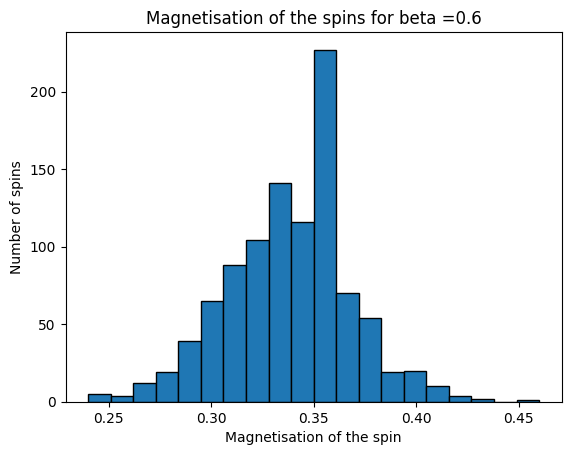

Epoch 0: 36.2115592956543
Epoch 100: -58.927215576171875
Epoch 200: -13.862336158752441
Epoch 300: -5.304201126098633
Epoch 400: -0.3743627965450287
Epoch 500: -4.120469093322754
Epoch 600: -2.3149211406707764
Epoch 700: -0.5151267051696777
Epoch 800: -6.836367607116699
Epoch 900: -2.837489128112793


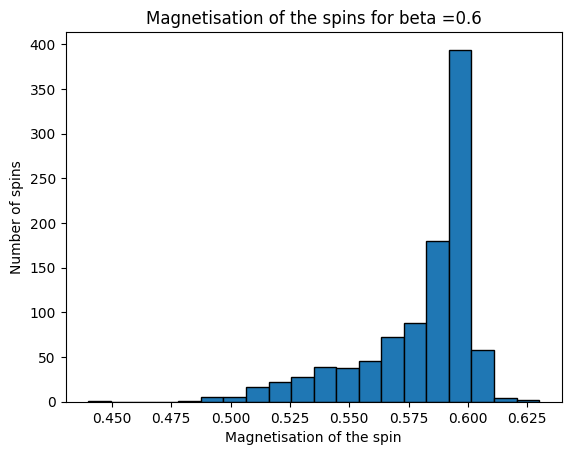

Epoch 0: 38.69578170776367
Epoch 100: -65.96983337402344
Epoch 200: -17.024822235107422
Epoch 300: -5.071197032928467
Epoch 400: -7.568378448486328
Epoch 500: -3.6764414310455322
Epoch 600: 0.09899281710386276
Epoch 700: -0.3514444828033447
Epoch 800: 0.05816778168082237
Epoch 900: -0.5649285912513733


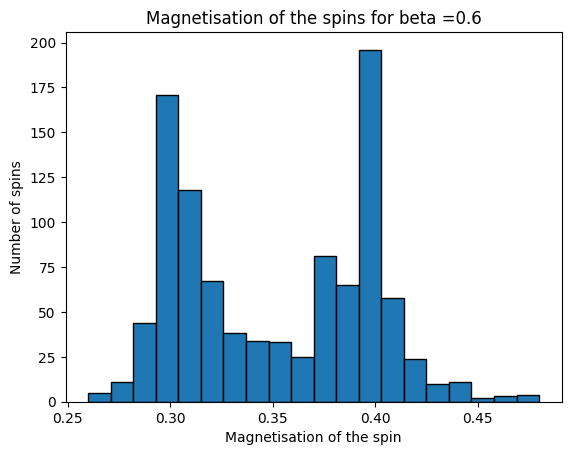

Epoch 0: 47.880924224853516
Epoch 100: -47.680145263671875
Epoch 200: -9.384369850158691
Epoch 300: 1.291780710220337
Epoch 400: -4.817210674285889
Epoch 500: -1.9015148878097534
Epoch 600: -1.9819036722183228
Epoch 700: 0.5889312624931335
Epoch 800: -2.8631582260131836
Epoch 900: -0.10878448188304901


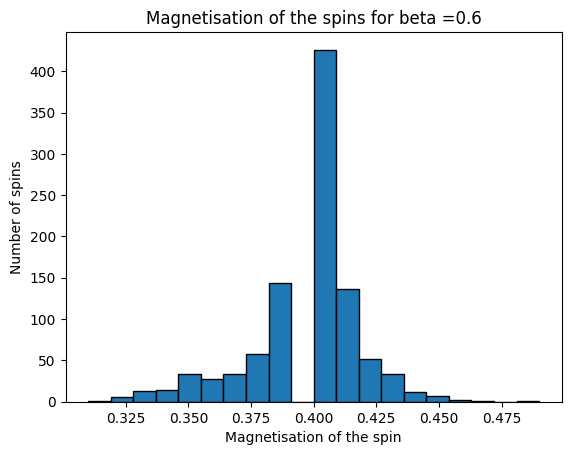

Epoch 0: 52.470359802246094
Epoch 100: -47.15732955932617
Epoch 200: -25.078819274902344
Epoch 300: -11.108935356140137
Epoch 400: -9.30191421508789
Epoch 500: -9.24352741241455
Epoch 600: -3.0258877277374268
Epoch 700: -6.206470966339111
Epoch 800: -4.751194477081299
Epoch 900: -0.6083278059959412


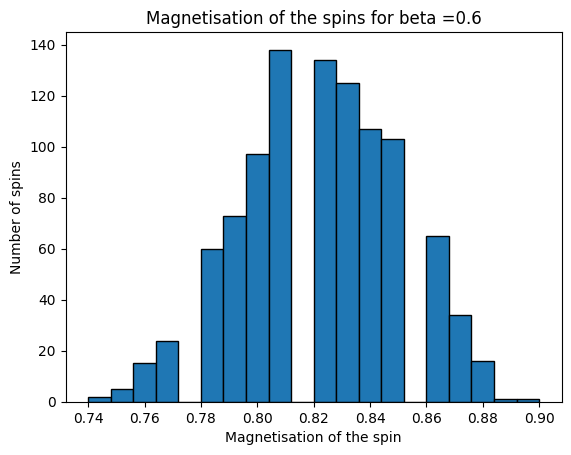

Epoch 0: 3.623652458190918
Epoch 100: -89.1658706665039
Epoch 200: -27.954126358032227
Epoch 300: -2.719197988510132
Epoch 400: -9.282371520996094
Epoch 500: -2.7135159969329834
Epoch 600: -0.3968304395675659
Epoch 700: 0.16826815903186798
Epoch 800: -5.500845909118652
Epoch 900: -0.8389954566955566


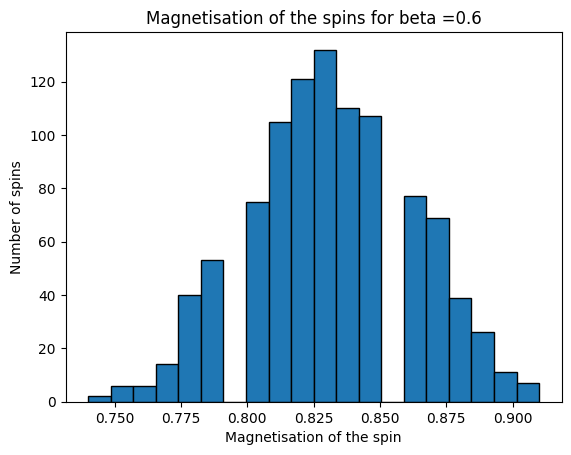

Epoch 0: 23.42105484008789
Epoch 100: -28.85238265991211
Epoch 200: -3.413255214691162
Epoch 300: -3.015096426010132
Epoch 400: -5.774272441864014
Epoch 500: -2.302602767944336
Epoch 600: -5.029944896697998
Epoch 700: -0.4982001483440399
Epoch 800: -0.36437079310417175
Epoch 900: 0.2854524850845337


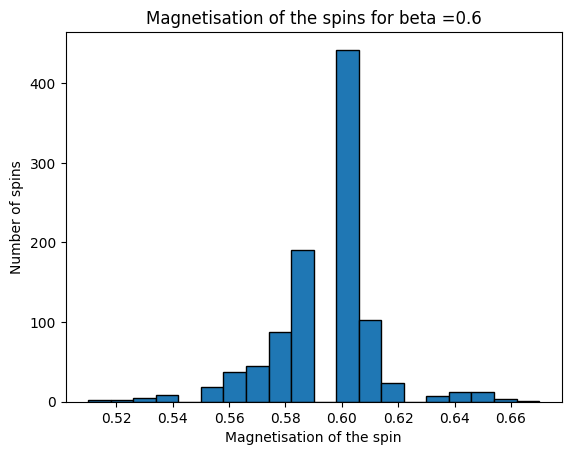

Epoch 0: 28.994178771972656
Epoch 100: -64.9475326538086
Epoch 200: -20.036535263061523
Epoch 300: -11.62120246887207
Epoch 400: -6.658393383026123
Epoch 500: -2.4458932876586914
Epoch 600: -2.056474208831787
Epoch 700: -2.979804754257202
Epoch 800: -0.7457559704780579
Epoch 900: -2.1622915267944336


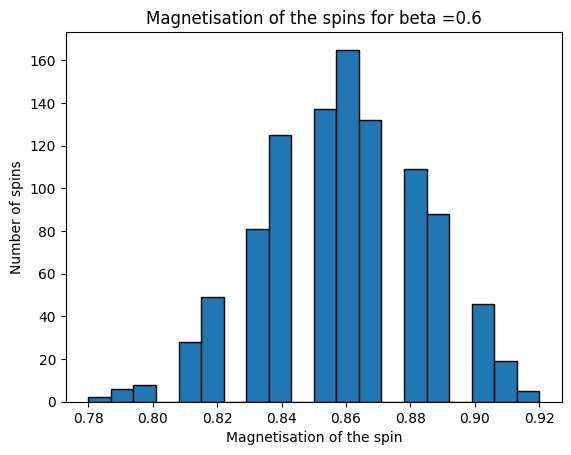

Epoch 0: 37.513458251953125
Epoch 100: -72.61275482177734
Epoch 200: -37.0369987487793
Epoch 300: -13.06889533996582
Epoch 400: -1.3876348733901978
Epoch 500: -13.160613059997559
Epoch 600: -4.01224946975708
Epoch 700: -1.3233715295791626
Epoch 800: -3.906059503555298
Epoch 900: -2.2224066257476807


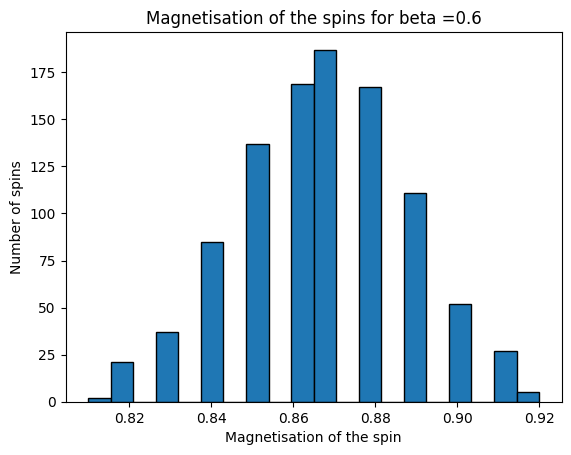

Epoch 0: 36.75296401977539
Epoch 100: -71.97637939453125
Epoch 200: -12.293122291564941
Epoch 300: -6.125400543212891
Epoch 400: -10.154037475585938
Epoch 500: -0.8743891716003418
Epoch 600: 1.1192587614059448
Epoch 700: -1.5748181343078613
Epoch 800: -0.5996596813201904
Epoch 900: 0.11868882924318314


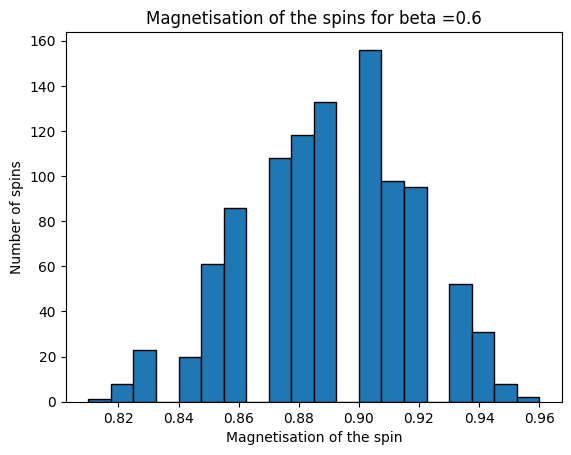

Epoch 0: -8.331494331359863
Epoch 100: -94.27107238769531
Epoch 200: -24.28143310546875
Epoch 300: -19.311506271362305
Epoch 400: -18.622133255004883
Epoch 500: -6.4443359375
Epoch 600: -5.621159553527832
Epoch 700: -1.754805564880371
Epoch 800: 0.21313637495040894
Epoch 900: -0.11813491582870483


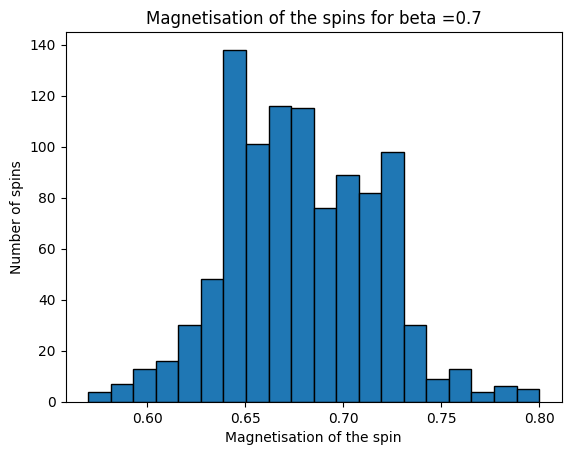

Epoch 0: -31.04172134399414
Epoch 100: -102.82244873046875
Epoch 200: -20.735519409179688
Epoch 300: -6.815561294555664
Epoch 400: -6.0204949378967285
Epoch 500: -5.278850555419922
Epoch 600: -1.9915437698364258
Epoch 700: -3.3552117347717285
Epoch 800: -0.5986009836196899
Epoch 900: -2.07656192779541


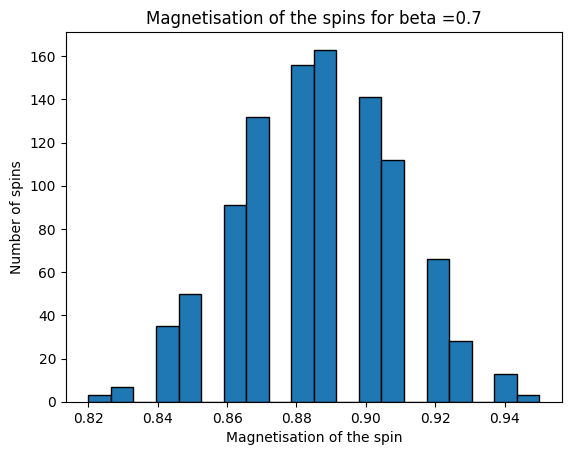

Epoch 0: 48.00096130371094
Epoch 100: -102.0073471069336
Epoch 200: -14.840335845947266
Epoch 300: -10.139073371887207
Epoch 400: -2.750995397567749
Epoch 500: -2.5976381301879883
Epoch 600: -4.491680145263672
Epoch 700: -2.8318281173706055
Epoch 800: -0.4838743507862091
Epoch 900: -1.2748229503631592


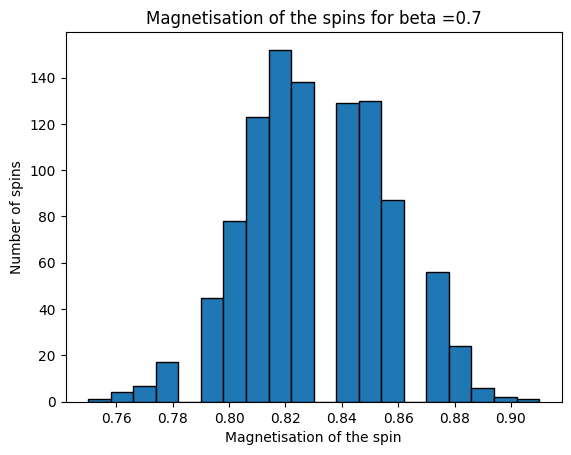

Epoch 0: 31.184877395629883
Epoch 100: -48.17045974731445
Epoch 200: -13.143610954284668
Epoch 300: -9.613173484802246
Epoch 400: -1.0423659086227417
Epoch 500: -1.2893863916397095
Epoch 600: -1.1425771713256836
Epoch 700: -3.252258539199829
Epoch 800: -0.9413681030273438
Epoch 900: -2.721583366394043


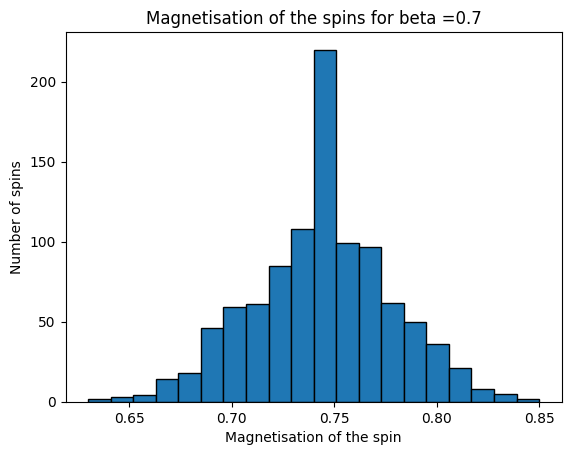

Epoch 0: -5.567783355712891
Epoch 100: -42.53279113769531
Epoch 200: -23.196977615356445
Epoch 300: -5.368240833282471
Epoch 400: -0.11258666962385178
Epoch 500: -1.922050952911377
Epoch 600: -1.682987093925476
Epoch 700: -0.7805143594741821
Epoch 800: -0.3861069083213806
Epoch 900: -5.090173244476318


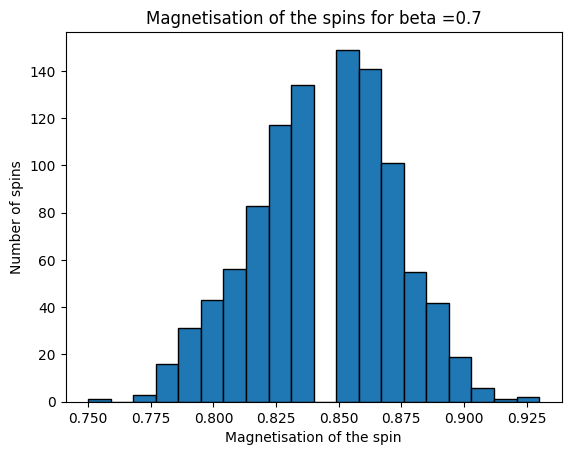

Epoch 0: 26.026182174682617
Epoch 100: -87.0339126586914
Epoch 200: -36.91773223876953
Epoch 300: -17.3077392578125
Epoch 400: -2.2173328399658203
Epoch 500: -2.4046506881713867
Epoch 600: -4.032151699066162
Epoch 700: -3.6538095474243164
Epoch 800: -2.5273287296295166
Epoch 900: -4.2268571853637695


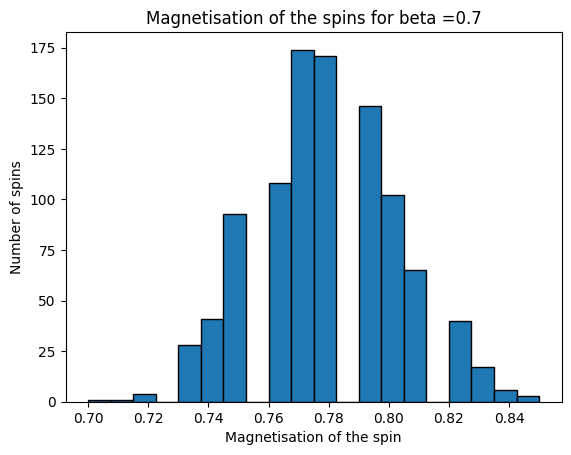

Epoch 0: 39.234336853027344
Epoch 100: -68.15774536132812
Epoch 200: -11.398100852966309
Epoch 300: -7.186036586761475
Epoch 400: -4.966553688049316
Epoch 500: -4.721890449523926
Epoch 600: -1.9491212368011475
Epoch 700: -0.830485999584198
Epoch 800: -1.4877487421035767
Epoch 900: 0.34599021077156067


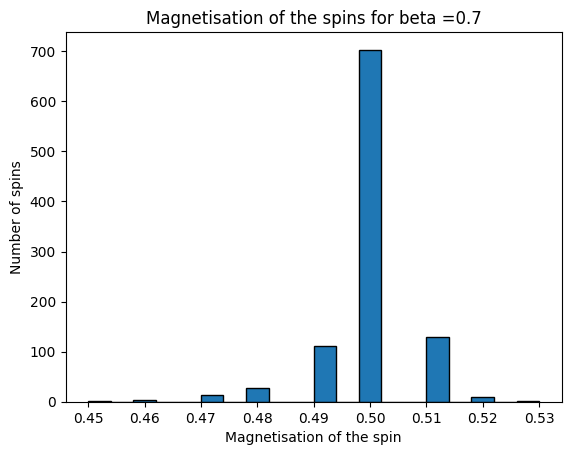

Epoch 0: 18.744272232055664
Epoch 100: -45.99102020263672
Epoch 200: -9.879627227783203
Epoch 300: -5.422151565551758
Epoch 400: -1.8518120050430298
Epoch 500: -1.655563235282898
Epoch 600: 0.2746330201625824
Epoch 700: -3.639317035675049
Epoch 800: -0.7557310461997986
Epoch 900: -2.44079327583313


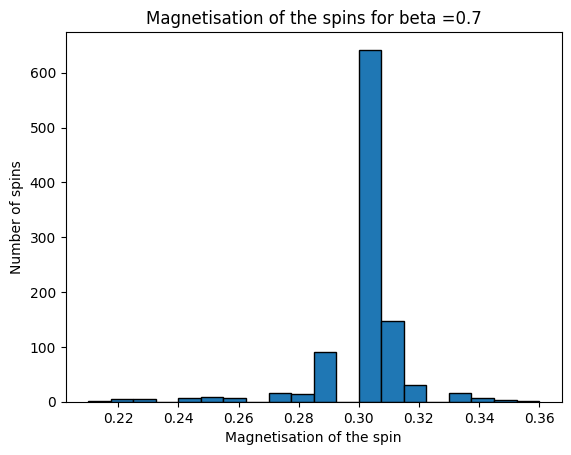

Epoch 0: 35.25666809082031
Epoch 100: -96.7531509399414
Epoch 200: -28.430776596069336
Epoch 300: -11.429717063903809
Epoch 400: -9.991374969482422
Epoch 500: -5.266583442687988
Epoch 600: -6.691147327423096
Epoch 700: -0.4559689462184906
Epoch 800: -4.112144947052002
Epoch 900: -4.4542059898376465


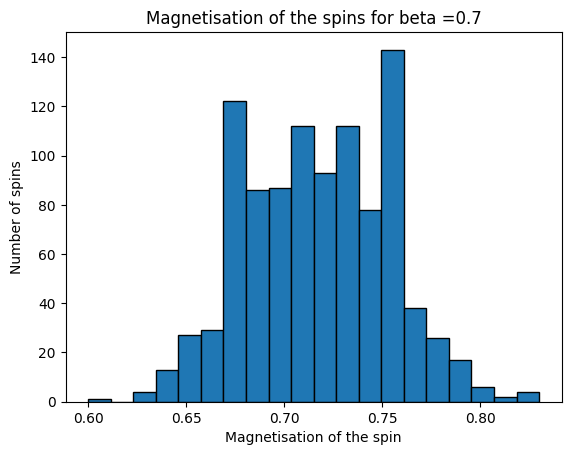

Epoch 0: 51.17084884643555
Epoch 100: -44.949100494384766
Epoch 200: -7.750001907348633
Epoch 300: -6.158452987670898
Epoch 400: -6.261397838592529
Epoch 500: -1.3619099855422974
Epoch 600: 0.18050645291805267
Epoch 700: -1.4572581052780151
Epoch 800: -0.30315321683883667
Epoch 900: -0.12548010051250458


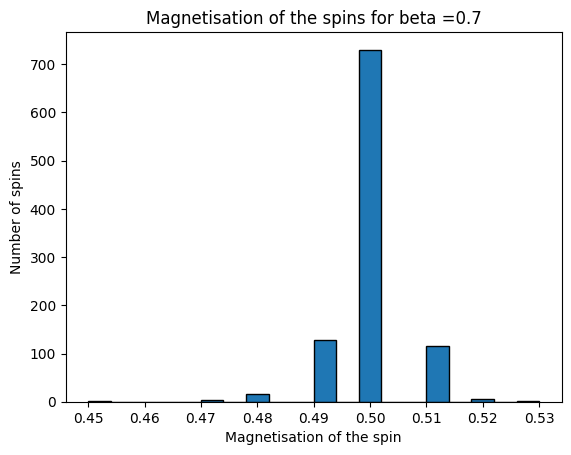

Epoch 0: 25.200864791870117
Epoch 100: -71.1022720336914
Epoch 200: -19.870563507080078
Epoch 300: -18.619359970092773
Epoch 400: -6.7321906089782715
Epoch 500: -9.154885292053223
Epoch 600: -2.065096855163574
Epoch 700: -3.7496674060821533
Epoch 800: -3.4349634647369385
Epoch 900: 0.0022170257288962603


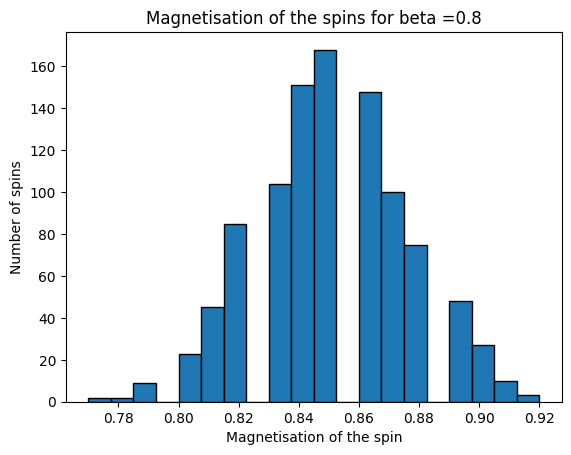

Epoch 0: 34.0333137512207
Epoch 100: -62.345115661621094
Epoch 200: -12.810693740844727
Epoch 300: -8.336996078491211
Epoch 400: -7.613377571105957
Epoch 500: -2.7238657474517822
Epoch 600: -1.1915385723114014
Epoch 700: -2.7720794677734375
Epoch 800: -8.307199478149414
Epoch 900: -5.780297756195068


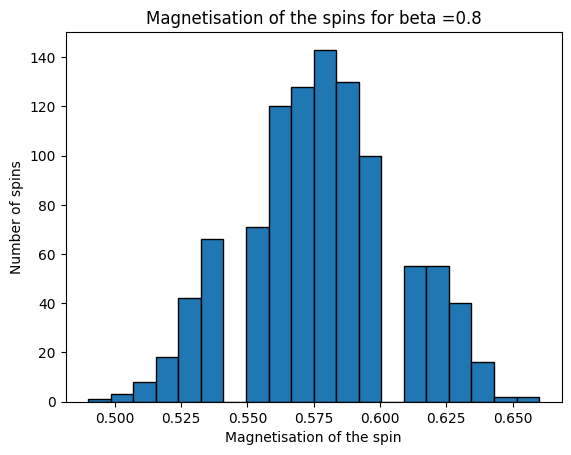

Epoch 0: 58.301719665527344
Epoch 100: -70.37242889404297
Epoch 200: -27.447221755981445
Epoch 300: 1.2216389179229736
Epoch 400: -0.4063577353954315
Epoch 500: -6.189692497253418
Epoch 600: -3.4882376194000244
Epoch 700: -2.9354348182678223
Epoch 800: -3.8146448135375977
Epoch 900: -1.3565728664398193


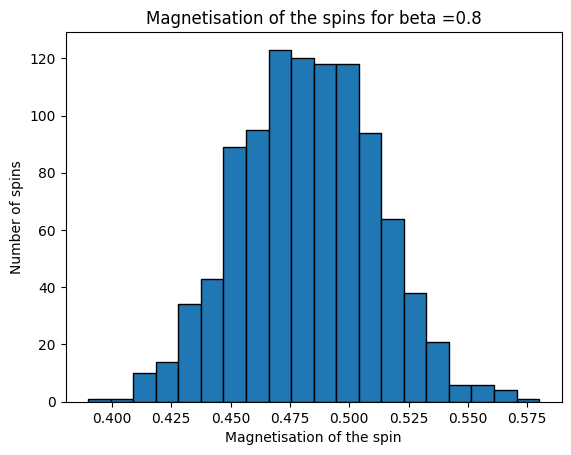

Epoch 0: 50.9023551940918
Epoch 100: -44.27080535888672
Epoch 200: -5.241117000579834
Epoch 300: -10.079082489013672
Epoch 400: -36.33159255981445
Epoch 500: -28.073652267456055
Epoch 600: -24.173242568969727
Epoch 700: -11.422521591186523
Epoch 800: -5.723697662353516
Epoch 900: -8.370134353637695


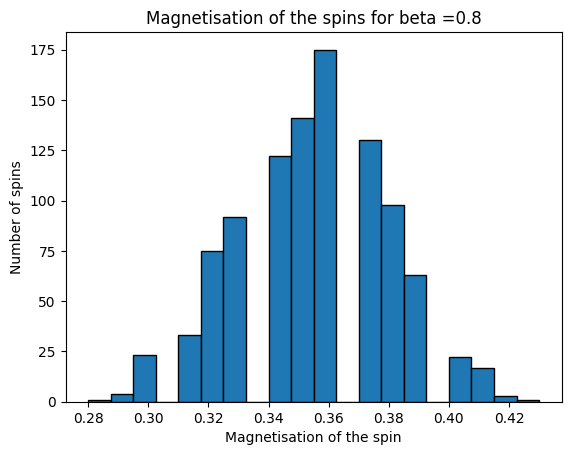

Epoch 0: 33.75672912597656
Epoch 100: -97.7988052368164
Epoch 200: -10.1235990524292
Epoch 300: -8.379098892211914
Epoch 400: 0.16579163074493408
Epoch 500: -0.3163370192050934
Epoch 600: -0.7288543581962585
Epoch 700: -4.763617515563965
Epoch 800: -3.0540292263031006
Epoch 900: -0.2633744180202484


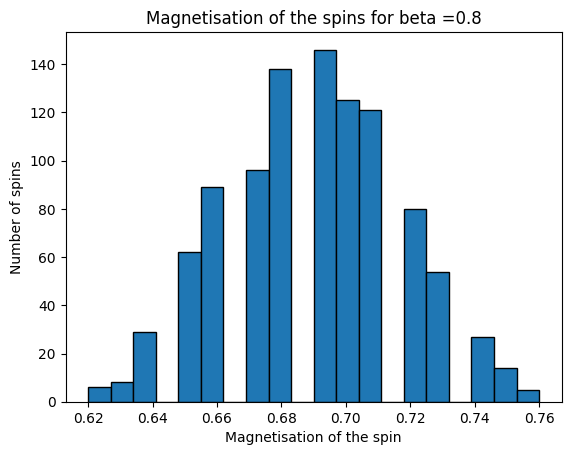

Epoch 0: 34.82474136352539
Epoch 100: -25.66010284423828
Epoch 200: -22.122272491455078
Epoch 300: -14.454568862915039
Epoch 400: -8.347092628479004
Epoch 500: -11.61206340789795
Epoch 600: -8.555126190185547
Epoch 700: -2.643092155456543
Epoch 800: -7.732171058654785
Epoch 900: -3.1514148712158203


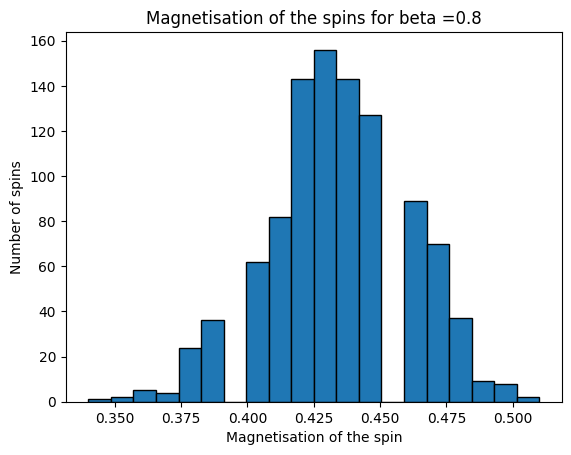

Epoch 0: -43.07526397705078
Epoch 100: -38.41371536254883
Epoch 200: -25.583232879638672
Epoch 300: -6.693387985229492
Epoch 400: -1.1395907402038574
Epoch 500: -8.350787162780762
Epoch 600: -0.13251903653144836
Epoch 700: -2.644747257232666
Epoch 800: -0.8400026559829712
Epoch 900: -1.6336767673492432


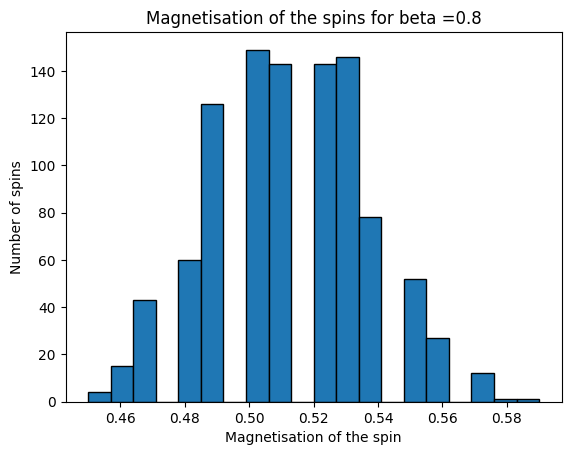

Epoch 0: -8.575231552124023
Epoch 100: -73.18959045410156
Epoch 200: -19.790077209472656
Epoch 300: -13.897989273071289
Epoch 400: -8.586005210876465
Epoch 500: -4.203329086303711
Epoch 600: -5.380903720855713
Epoch 700: -0.6080197095870972
Epoch 800: -0.12718045711517334
Epoch 900: -0.2584245204925537


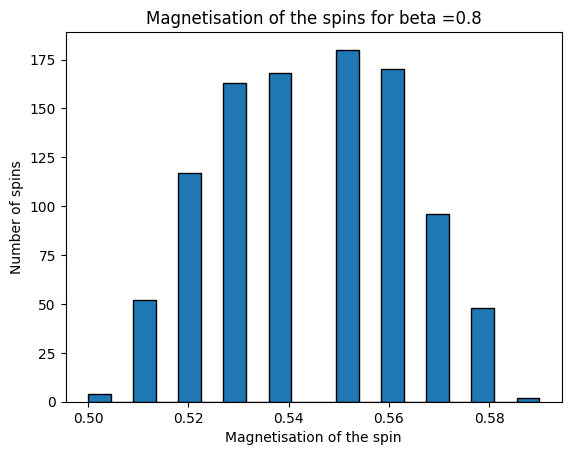

Epoch 0: 17.516637802124023
Epoch 100: -45.976593017578125
Epoch 200: -10.354336738586426
Epoch 300: -5.000931739807129
Epoch 400: -1.6191089153289795
Epoch 500: -1.7489373683929443
Epoch 600: -1.6705797910690308
Epoch 700: -2.023197889328003
Epoch 800: 0.18803323805332184
Epoch 900: -0.04035826772451401


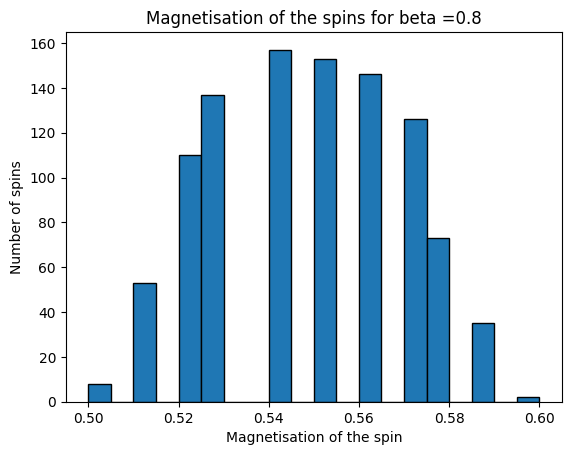

Epoch 0: 73.47811889648438
Epoch 100: -78.35863494873047
Epoch 200: -18.2374210357666
Epoch 300: -1.3176442384719849
Epoch 400: -0.5406173467636108
Epoch 500: -9.976335525512695
Epoch 600: -3.0224435329437256
Epoch 700: -2.7846744060516357
Epoch 800: -8.458142280578613
Epoch 900: -1.8080352544784546


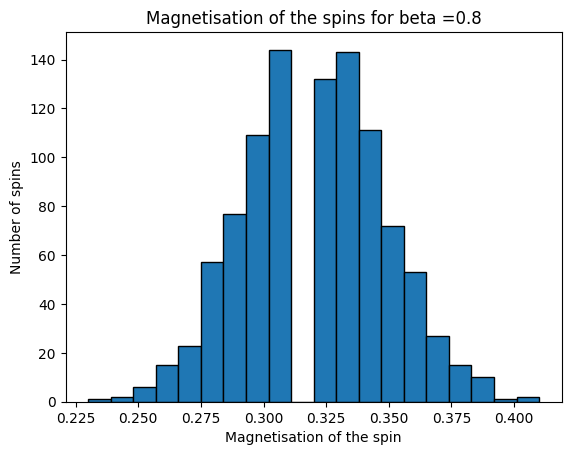

Epoch 0: 7.911459922790527
Epoch 100: -54.8620719909668
Epoch 200: -17.936710357666016
Epoch 300: -5.970263481140137
Epoch 400: -4.507941722869873
Epoch 500: -0.955048680305481
Epoch 600: -1.9652907848358154
Epoch 700: -0.8259846568107605
Epoch 800: -6.366069316864014
Epoch 900: -0.6778218150138855


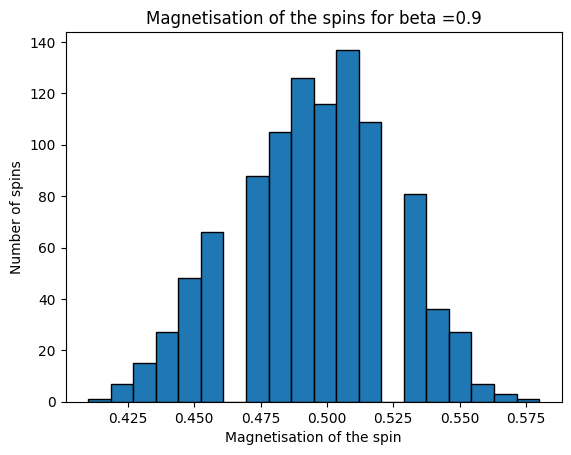

Epoch 0: -16.560667037963867
Epoch 100: -147.49163818359375
Epoch 200: -34.32954406738281
Epoch 300: -14.424399375915527
Epoch 400: -10.347232818603516
Epoch 500: -4.685822010040283
Epoch 600: -2.7637784481048584
Epoch 700: -1.0063848495483398
Epoch 800: -1.2238861322402954
Epoch 900: -0.5206908583641052


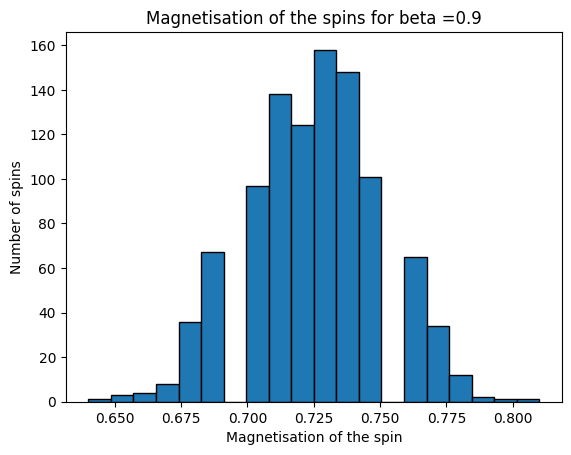

Epoch 0: 4.072070121765137
Epoch 100: -113.11981201171875
Epoch 200: -53.4725456237793
Epoch 300: -41.461814880371094
Epoch 400: -39.718868255615234
Epoch 500: -18.534231185913086
Epoch 600: -16.343772888183594
Epoch 700: -11.666969299316406
Epoch 800: -6.844938278198242
Epoch 900: -9.901955604553223


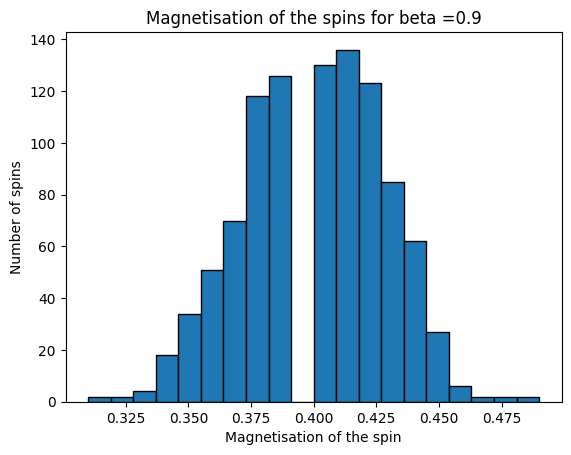

Epoch 0: -48.789154052734375
Epoch 100: -99.28150177001953
Epoch 200: -18.290096282958984
Epoch 300: -5.176252365112305
Epoch 400: -4.898238658905029
Epoch 500: -5.640283107757568
Epoch 600: -1.2401546239852905
Epoch 700: -5.556552886962891
Epoch 800: -2.35135817527771
Epoch 900: 0.1437695324420929


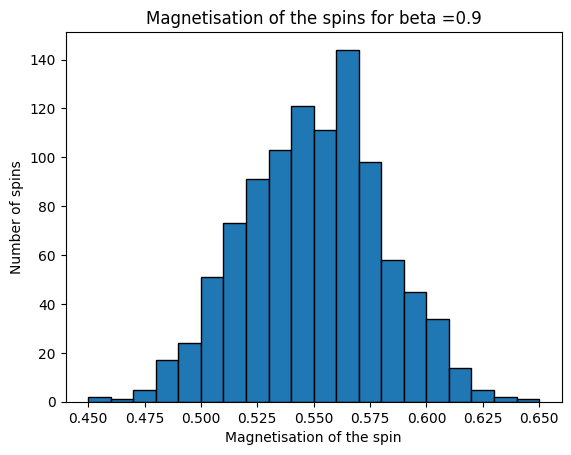

Epoch 0: 27.017528533935547
Epoch 100: -39.6921501159668
Epoch 200: -22.19559097290039
Epoch 300: -0.8945480585098267
Epoch 400: -3.9597890377044678
Epoch 500: -5.82830810546875
Epoch 600: -3.4864754676818848
Epoch 700: -4.150285720825195
Epoch 800: -0.6374728679656982
Epoch 900: -5.095119476318359


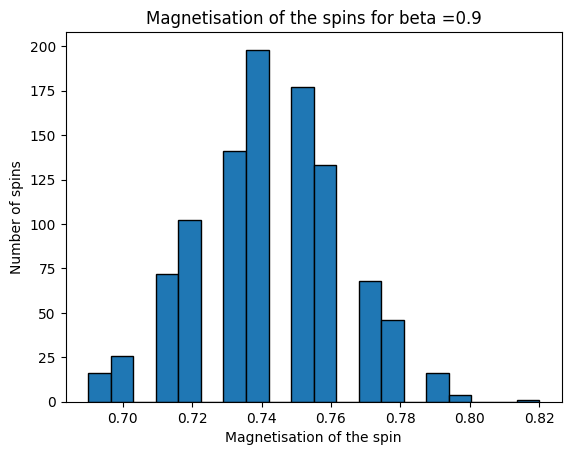

Epoch 0: 24.044404983520508
Epoch 100: -61.74408721923828
Epoch 200: -32.811927795410156
Epoch 300: -19.803089141845703
Epoch 400: -1.5945936441421509
Epoch 500: -8.595511436462402
Epoch 600: -3.1027867794036865
Epoch 700: -2.665457248687744
Epoch 800: -5.377791881561279
Epoch 900: -0.3341447412967682


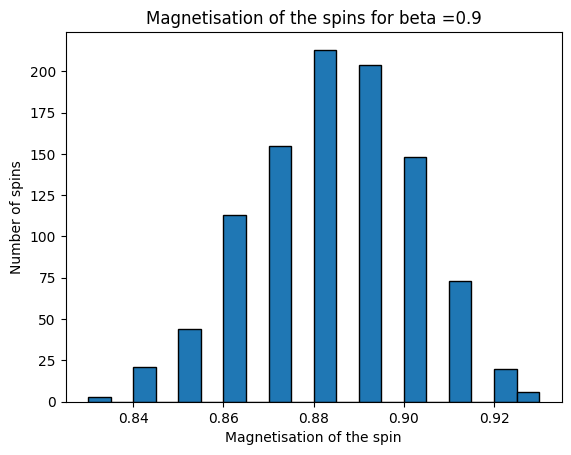

Epoch 0: -3.082021474838257
Epoch 100: -36.163856506347656
Epoch 200: -4.300216197967529
Epoch 300: -3.043829917907715
Epoch 400: -2.6529436111450195
Epoch 500: -1.7771891355514526
Epoch 600: -0.02698829583823681
Epoch 700: -0.8087490200996399
Epoch 800: -3.4731338024139404
Epoch 900: -0.4112182855606079


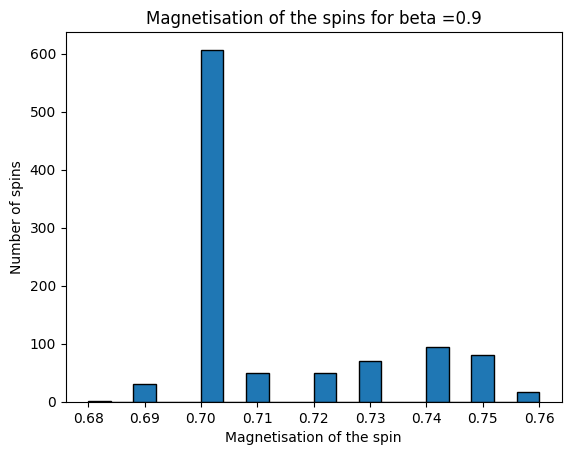

Epoch 0: 74.0377426147461
Epoch 100: -56.950138092041016
Epoch 200: -17.1523494720459
Epoch 300: -7.6818647384643555
Epoch 400: -3.0000417232513428
Epoch 500: -1.3393665552139282
Epoch 600: -1.7311692237854004
Epoch 700: -1.3098536729812622
Epoch 800: -0.7061352729797363
Epoch 900: -0.6820269227027893


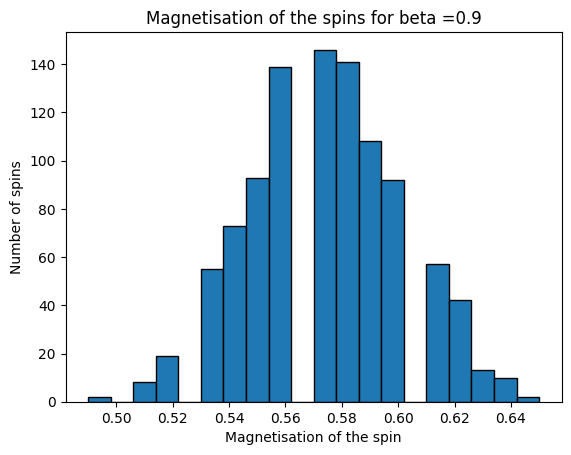

Epoch 0: 26.867294311523438
Epoch 100: -131.10748291015625
Epoch 200: -50.34596633911133
Epoch 300: -29.239215850830078
Epoch 400: 1.8723448514938354
Epoch 500: -3.3940746784210205
Epoch 600: -4.6638288497924805
Epoch 700: -3.187497615814209
Epoch 800: -0.9033502340316772
Epoch 900: -1.1017334461212158


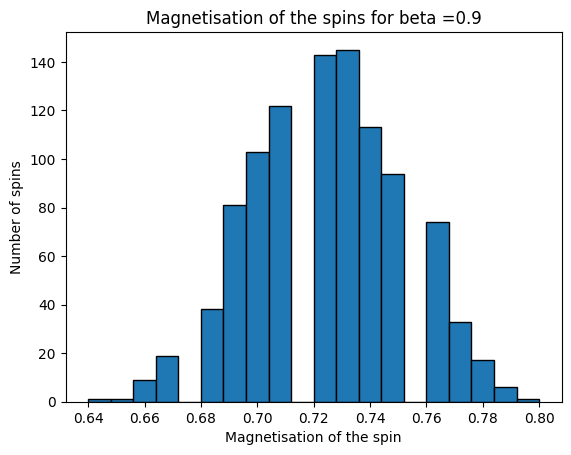

Epoch 0: 45.818538665771484
Epoch 100: -143.01731872558594
Epoch 200: -42.19454574584961
Epoch 300: -22.37323760986328
Epoch 400: -11.0631742477417
Epoch 500: -8.401466369628906
Epoch 600: -4.925243377685547
Epoch 700: -5.130914211273193
Epoch 800: 0.10066953301429749
Epoch 900: -1.133568286895752


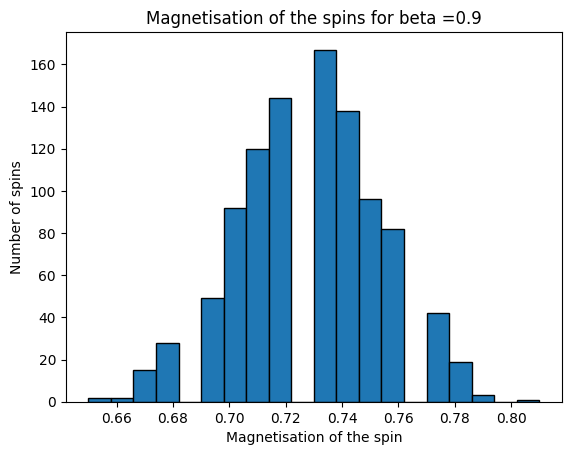

Epoch 0: 72.00475311279297
Epoch 100: -111.17132568359375
Epoch 200: -25.331520080566406
Epoch 300: -1.0820703506469727
Epoch 400: -0.5441400408744812
Epoch 500: -8.228976249694824
Epoch 600: -5.505453109741211
Epoch 700: -1.4860038757324219
Epoch 800: -0.7363371849060059
Epoch 900: -4.652379035949707


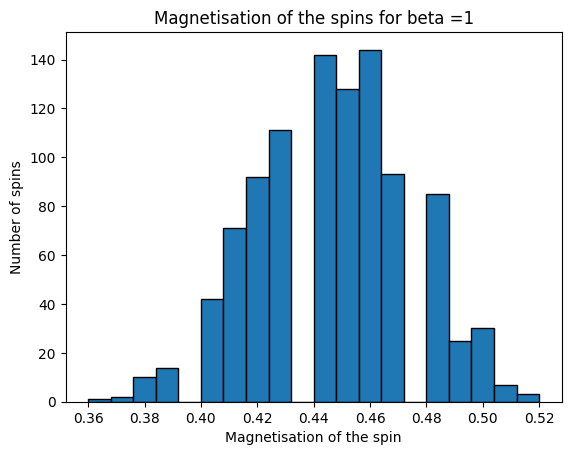

Epoch 0: 91.43623352050781
Epoch 100: -131.12863159179688
Epoch 200: -8.578564643859863
Epoch 300: -6.88525390625
Epoch 400: -0.7178407311439514
Epoch 500: -2.113117218017578
Epoch 600: -1.6031014919281006
Epoch 700: -1.0177172422409058
Epoch 800: -0.8794091939926147
Epoch 900: -0.5842576026916504


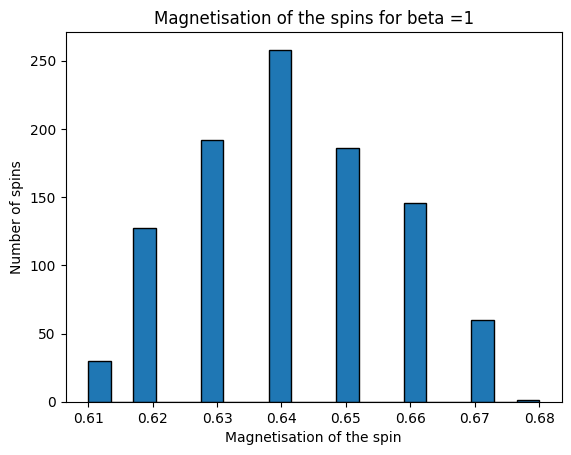

Epoch 0: 68.75048828125
Epoch 100: -32.27436447143555
Epoch 200: -16.709426879882812
Epoch 300: -2.6469485759735107
Epoch 400: -1.9999258518218994
Epoch 500: -3.838430404663086
Epoch 600: -5.045266628265381
Epoch 700: -4.590271949768066
Epoch 800: -1.146928310394287
Epoch 900: -4.776020050048828


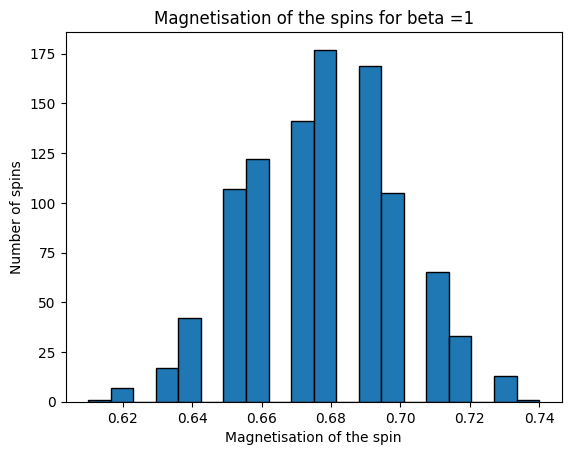

Epoch 0: 109.50308227539062
Epoch 100: -30.662860870361328
Epoch 200: -30.340208053588867
Epoch 300: -7.383368015289307
Epoch 400: -2.9524450302124023
Epoch 500: -7.534336090087891
Epoch 600: -5.914064884185791
Epoch 700: -0.9967190027236938
Epoch 800: -3.782374382019043
Epoch 900: -0.8400161266326904


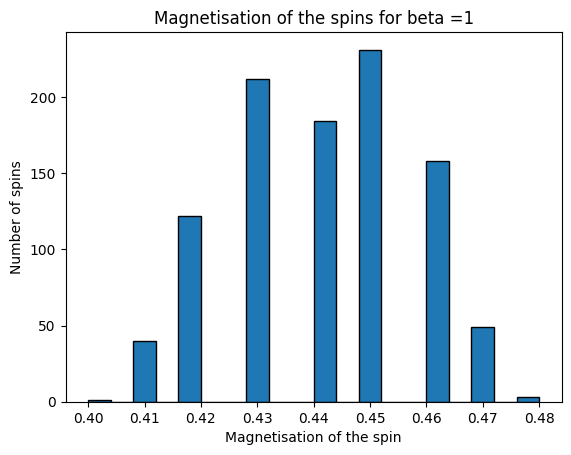

Epoch 0: 89.03357696533203
Epoch 100: -101.98480224609375
Epoch 200: -14.365117073059082
Epoch 300: -5.9473443031311035
Epoch 400: -3.4140005111694336
Epoch 500: -4.357546329498291
Epoch 600: -4.5789384841918945
Epoch 700: -4.341024875640869
Epoch 800: -0.9843368530273438
Epoch 900: -1.1955437660217285


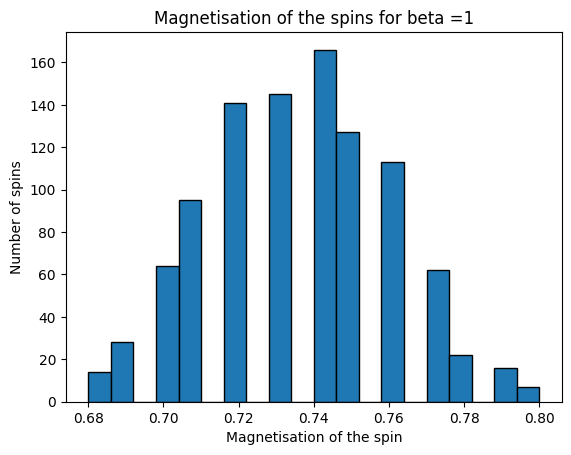

Epoch 0: 31.052871704101562
Epoch 100: -190.25926208496094
Epoch 200: -53.30818176269531
Epoch 300: -17.845630645751953
Epoch 400: -11.165663719177246
Epoch 500: -10.700522422790527
Epoch 600: -3.076977252960205
Epoch 700: -4.758976936340332
Epoch 800: -0.10522966086864471
Epoch 900: -4.175174236297607


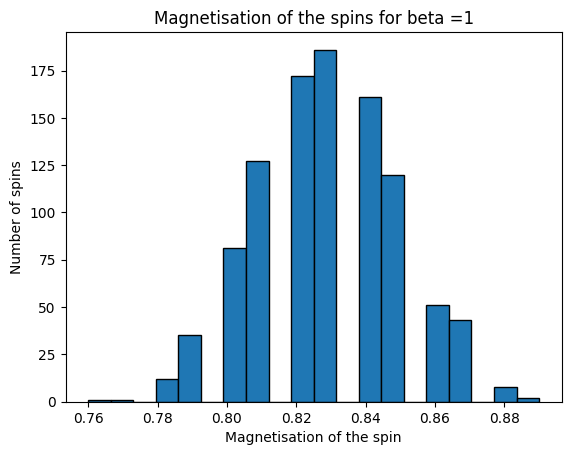

Epoch 0: 55.16753005981445
Epoch 100: -100.88107299804688
Epoch 200: -14.19839096069336
Epoch 300: -15.021279335021973
Epoch 400: -10.764577865600586
Epoch 500: -3.6030874252319336
Epoch 600: -2.4110023975372314
Epoch 700: -3.261631965637207
Epoch 800: -1.3311114311218262
Epoch 900: -7.351506233215332


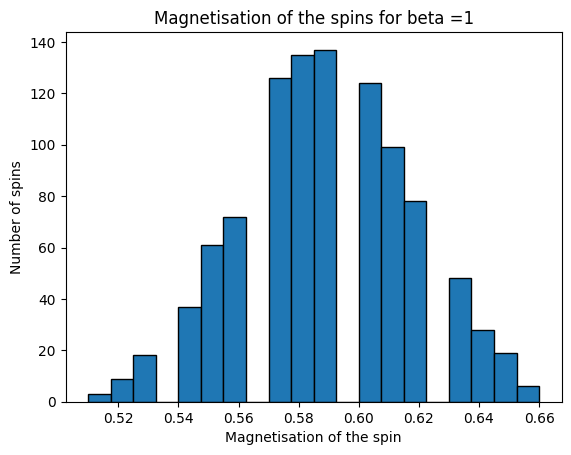

Epoch 0: 0.3025537133216858
Epoch 100: -104.55326080322266
Epoch 200: -19.18061065673828
Epoch 300: -9.348343849182129
Epoch 400: -9.191036224365234
Epoch 500: 0.4424530267715454
Epoch 600: 0.29085031151771545
Epoch 700: -6.422741889953613
Epoch 800: -1.507312297821045
Epoch 900: -0.6352652907371521


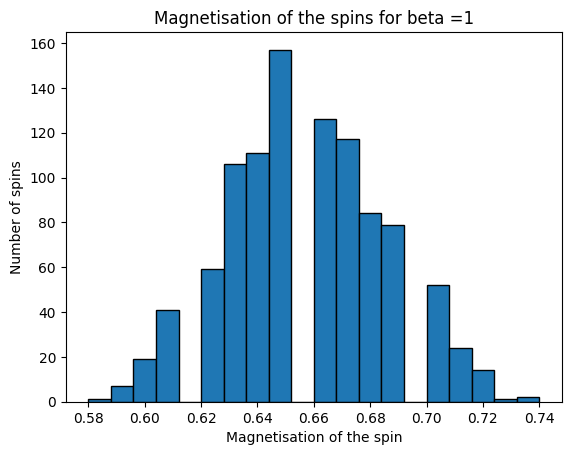

Epoch 0: 85.5283432006836
Epoch 100: -69.36152648925781
Epoch 200: -1.5356765985488892
Epoch 300: -30.519582748413086
Epoch 400: -16.45275115966797
Epoch 500: -2.2906789779663086
Epoch 600: -1.895693302154541
Epoch 700: -3.795778512954712
Epoch 800: -3.2693140506744385
Epoch 900: -7.080118179321289


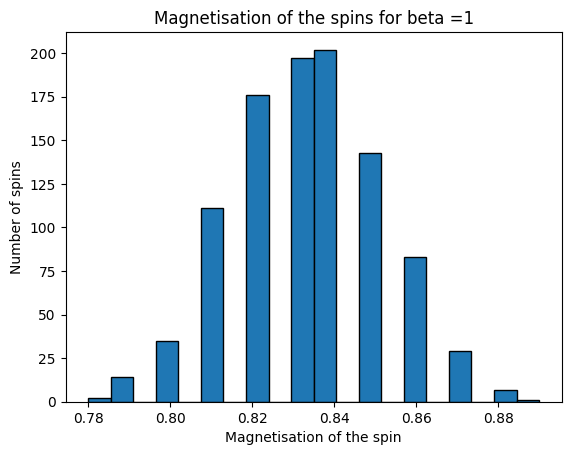

Epoch 0: 2.6394383907318115
Epoch 100: -36.44078063964844
Epoch 200: -13.6152982711792
Epoch 300: -3.468287467956543
Epoch 400: -5.801908493041992
Epoch 500: -1.4585992097854614
Epoch 600: -0.2937397062778473
Epoch 700: -1.5637829303741455
Epoch 800: -1.0142183303833008
Epoch 900: -0.6572167873382568


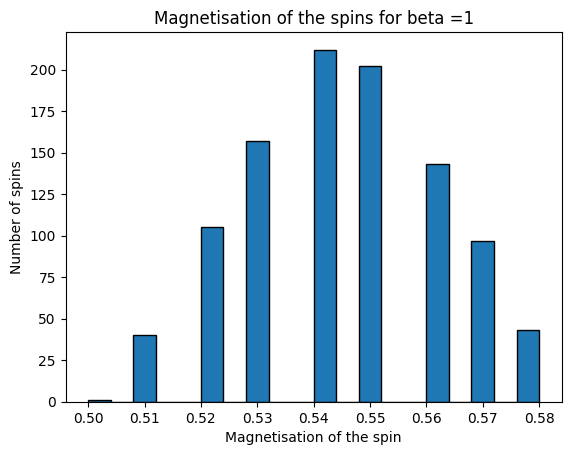

Epoch 0: 30.295272827148438
Epoch 100: -53.01982498168945
Epoch 200: -33.270790100097656
Epoch 300: -11.704120635986328
Epoch 400: -11.529422760009766
Epoch 500: -4.910908222198486
Epoch 600: -4.574929237365723
Epoch 700: -7.931547164916992
Epoch 800: -17.726295471191406
Epoch 900: 3.7904016971588135


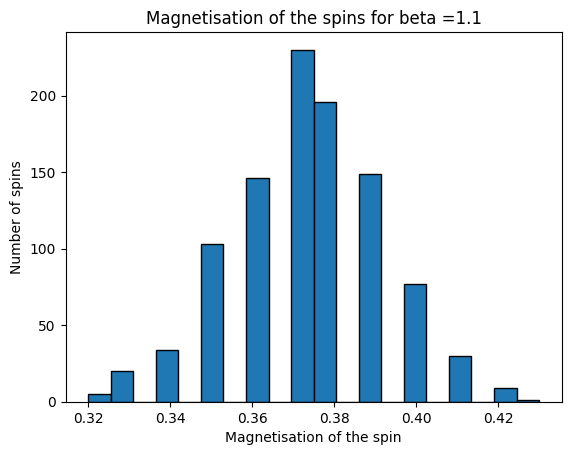

Epoch 0: 38.141204833984375
Epoch 100: -42.59059524536133
Epoch 200: -42.369564056396484
Epoch 300: -61.18052673339844
Epoch 400: -27.25910186767578
Epoch 500: -36.37163543701172
Epoch 600: -23.831743240356445
Epoch 700: -12.99087905883789
Epoch 800: -6.780231475830078
Epoch 900: -4.758211612701416


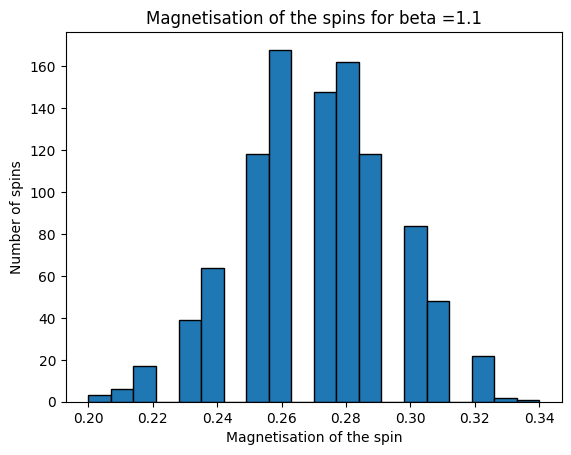

Epoch 0: 83.60101318359375
Epoch 100: -60.1516227722168
Epoch 200: -31.943191528320312
Epoch 300: -30.564010620117188
Epoch 400: -12.29430866241455
Epoch 500: -9.50539493560791
Epoch 600: -6.239177227020264
Epoch 700: -9.175593376159668
Epoch 800: 1.4089199304580688
Epoch 900: 0.9302485585212708


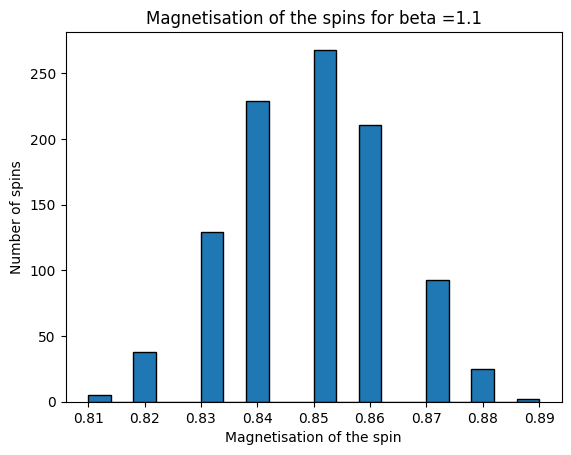

Epoch 0: 61.5374870300293
Epoch 100: -76.21483612060547
Epoch 200: -16.336606979370117
Epoch 300: -7.430994033813477
Epoch 400: -2.999877691268921
Epoch 500: -0.23134765028953552
Epoch 600: -0.9568057060241699
Epoch 700: -1.7001795768737793
Epoch 800: -1.2037795782089233
Epoch 900: -8.886795997619629


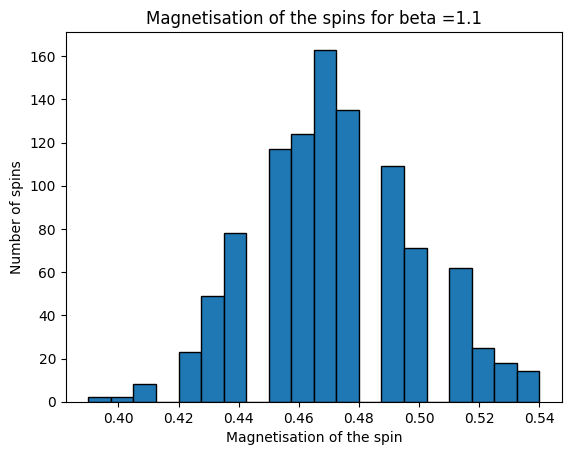

Epoch 0: 69.60833740234375
Epoch 100: -112.68646240234375
Epoch 200: -14.287215232849121
Epoch 300: -12.410747528076172
Epoch 400: -9.643145561218262
Epoch 500: -8.776000022888184
Epoch 600: -8.902998924255371
Epoch 700: -7.454940319061279
Epoch 800: -1.4197405576705933
Epoch 900: -1.5865603685379028


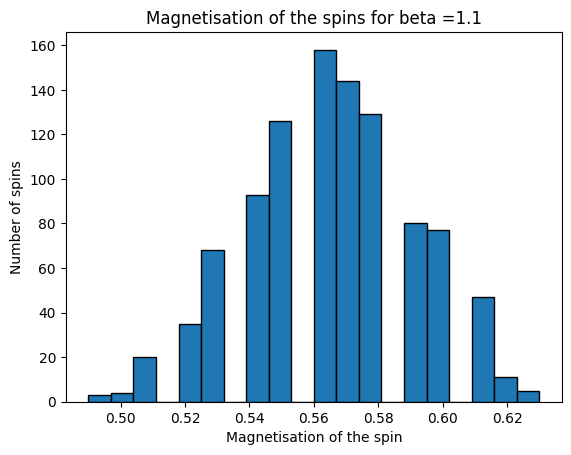

Epoch 0: 4.609893798828125
Epoch 100: -102.4082260131836
Epoch 200: -29.84113121032715
Epoch 300: -6.113605976104736
Epoch 400: -5.660794258117676
Epoch 500: -3.050563335418701
Epoch 600: -2.022364616394043
Epoch 700: -2.9850575923919678
Epoch 800: -0.7751860022544861
Epoch 900: -7.574589252471924


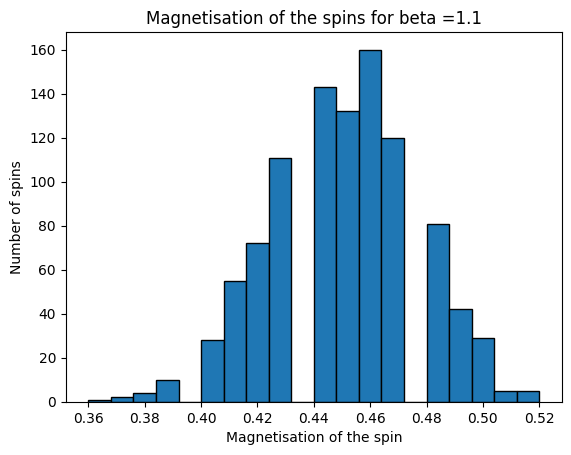

Epoch 0: 44.937782287597656
Epoch 100: -76.62142944335938
Epoch 200: -32.65898132324219
Epoch 300: 0.3440612852573395
Epoch 400: 20.7408504486084
Epoch 500: -49.118408203125
Epoch 600: -31.019357681274414
Epoch 700: -19.8248233795166
Epoch 800: -11.396090507507324
Epoch 900: -11.79235553741455


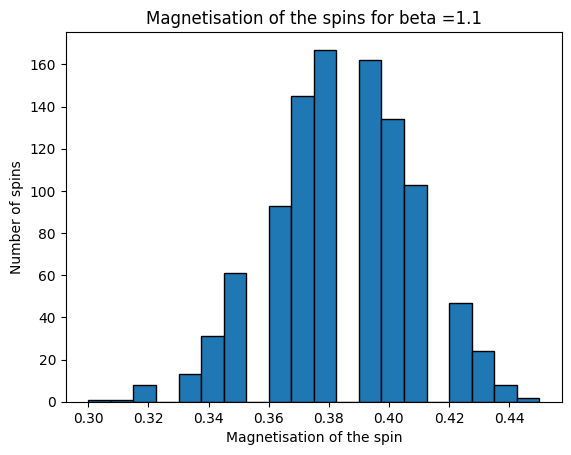

Epoch 0: 36.15258026123047
Epoch 100: -97.35159301757812
Epoch 200: -36.650360107421875
Epoch 300: -18.516403198242188
Epoch 400: -10.334212303161621
Epoch 500: -8.222609519958496
Epoch 600: -1.4113094806671143
Epoch 700: -4.957653522491455
Epoch 800: -5.531084060668945
Epoch 900: 0.6531363129615784


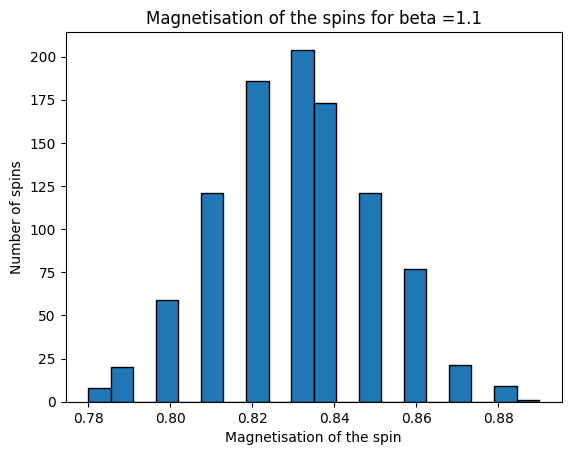

Epoch 0: 36.482276916503906
Epoch 100: -164.32200622558594
Epoch 200: -22.76421546936035
Epoch 300: -15.081328392028809
Epoch 400: -6.030168533325195
Epoch 500: -9.699317932128906
Epoch 600: -3.7371814250946045
Epoch 700: -9.848028182983398
Epoch 800: -4.615451335906982
Epoch 900: -2.424746036529541


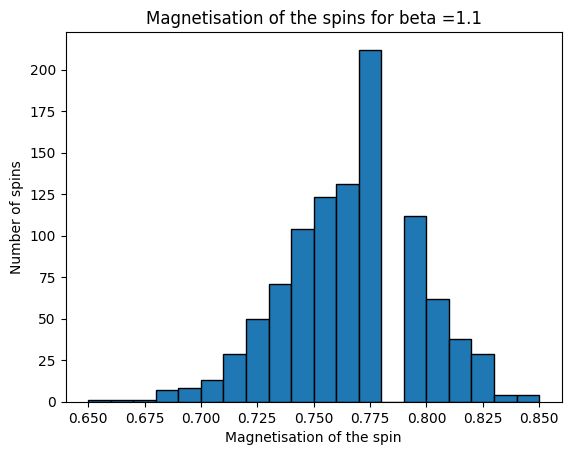

Epoch 0: 41.46873092651367
Epoch 100: -59.86955261230469
Epoch 200: -4.934154510498047
Epoch 300: -8.317802429199219
Epoch 400: -5.248166084289551
Epoch 500: -15.307302474975586
Epoch 600: -1.3459985256195068
Epoch 700: -12.756156921386719
Epoch 800: -7.638155937194824
Epoch 900: -2.920567274093628


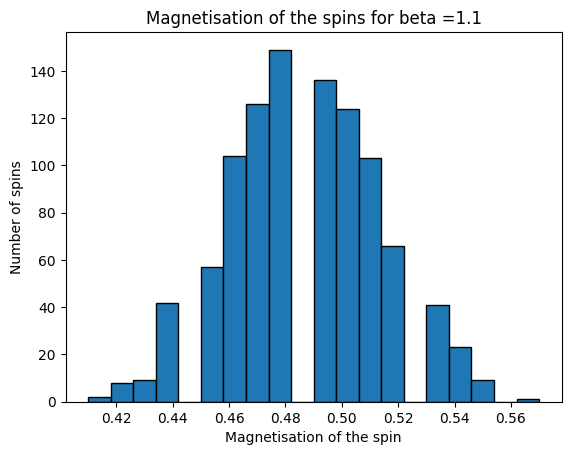

In [ ]:


### WITHOUT ANNEALING


betas=[ 0.6, 0.7, 0.8, 0.9, 1, 1.1]

for beta in betas: 
    magnetisations_list=[]

    for i in range(10):
        my_model = VAN(taille)
        losses = train(my_model, lambda x:  log_prob_target_energie(x, beta), batch_size=200, n_iter=1000, lr=0.01)
        mysample=my_model.sample(1000)
        magnetisations=[]
        for spin in mysample:
            magnetisations.append(torch.mean(spin))
        plt.hist(magnetisations, bins=20, edgecolor='black') 
        plt.xlabel('Magnetisation of the spin')
        plt.ylabel('Number of spins')
        plt.title('Magnetisation of the spins for beta =' + str(beta))
        plt.savefig('./figures/magnetisation_for beta= '+str(beta)+ 'test n° ' +str(i) + '.png')
        magnetisations_list.append(magnetisations)
        plt.show()
    pd.DataFrame(magnetisations_list).to_csv('./magnetisations/magnetisations for beta= '+str(beta)+'.csv')
